In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
all_df = pd.read_csv('./data/all_df.csv')
all_df.drop('Unnamed: 0', axis=1, inplace=True)
all_df

,dt,AverageTemperature,City,Latitude,Longitude
0,1907,-0.337,Århus,57.0,10.3
1,1907,0.460,Århus,57.0,10.3
2,1909,0.779,Århus,57.0,10.3
3,1909,-0.476,Århus,57.0,10.3
4,1910,0.763,Århus,57.0,10.3
...,...,...,...,...,...
2420771,1967,23.834,Newport News,37.7,-77.2
2420772,1967,18.688,Newport News,37.7,-77.2
2420773,1967,13.540,Newport News,37.7,-77.2
2420774,1967,6.543,Newport News,37.7,-77.2


In [18]:
COLUMNS = all_df.axes[1].to_list()
COLUMNS.append('Year_average_temp')
COLUMNS

['dt',
 'AverageTemperature',
 'City',
 'Latitude',
 'Longitude',
 'Year_average_temp']

In [19]:
new_df = pd.DataFrame(columns=COLUMNS)
new_df

,dt,AverageTemperature,City,Latitude,Longitude,Year_average_temp


In [22]:
CITIES = all_df['City'].unique()
city_df_list = []
for i, city in enumerate(CITIES):
    a_city = all_df.loc[all_df['City']==city]
    a_city_df = a_city.drop_duplicates(['dt']).drop('AverageTemperature', axis=1)
    years = a_city['dt'].unique()
    year_mean_temp_list = []
    for j, year in enumerate(years):
        a_year = a_city.loc[a_city['dt']==year]
        year_mean = a_year['AverageTemperature'].mean()
        year_mean_temp_list.append(year_mean)
    year_mean_temp = np.array(year_mean_temp_list)
    a_city_df['Year_average_temp'] = year_mean_temp
    new_df = pd.concat([new_df, a_city_df])

new_df.drop('AverageTemperature', axis=1, inplace=True)  
    
    

KeyError: "['AverageTemperature'] not found in axis"

In [ ]:
new_df.reset_index(inplace=True, drop=True)
new_df.to_csv('./data/position_year_average_temp.csv')

In [ ]:
x = new_df['Latitude'].to_numpy()
y = new_df['Longitude'].to_numpy()
z = new_df['dt'].to_numpy()
cm = new_df['Year_average_temp'].to_numpy()


In [ ]:
%matplotlib inline

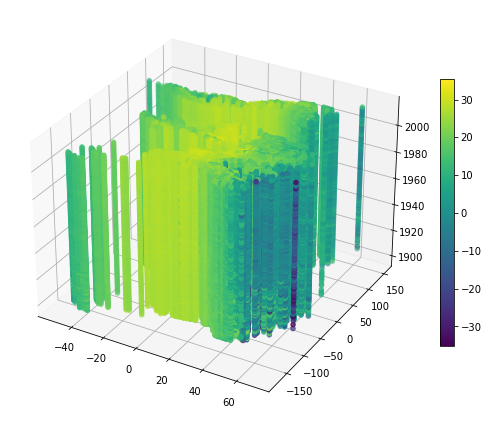

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(x, y, z, c=cm)
fig.colorbar(p, fraction=0.03, pad=0.05)

plt.show()

In [21]:
new_df = pd.read_csv('./data/position_year_average_temp.csv')
new_df.drop('Unnamed: 0', axis=1, inplace=True)
new_df

,dt,City,Latitude,Longitude,Year_average_temp
0,1915,Montreal,45.8,72.6,5.819083
1,1918,Montreal,45.8,72.6,7.562500
2,1919,Montreal,45.8,72.6,6.675000
3,1921,Montreal,45.8,72.6,11.803375
4,1922,Montreal,45.8,72.6,5.027700
...,...,...,...,...,...
391240,2009,Zuwarah,32.9,-12.4,20.537000
391241,2010,Zuwarah,32.9,-12.4,21.425364
391242,2011,Zuwarah,32.9,-12.4,20.274364
391243,2012,Zuwarah,32.9,-12.4,20.808000


In [15]:
position_df = new_df[['City', 'Latitude', 'Longitude']].drop_duplicates()
position_df.reset_index(inplace=True, drop=True)
position_df

,City,Latitude,Longitude
0,Montreal,45.8,72.6
1,Toronto,44.2,80.5
2,Santiago,-32.9,69.8
3,Changchun,44.2,-125.2
4,Chengdu,31.3,-103.6
...,...,...,...
3468,Ziguinchor,12.0,16.4
3469,Zinder,13.6,-9.0
3470,Zouxian,36.1,-117.3
3471,Zunyi,28.1,-106.3


In [16]:
position_df.to_csv('./data/city_position.csv', index=None)

下面对位置信息进行聚类分析

In [8]:
import seaborn as sns  #用于画热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，画层次聚类图的工具包
from scipy import cluster
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包

In [13]:
df = position_df
df

,City,Latitude,Longitude
0,Montreal,0.802621,0.760671
1,Toronto,0.789517,0.784756
2,Santiago,0.158067,0.752134
3,Changchun,0.789517,0.157622
4,Chengdu,0.683866,0.223476
...,...,...,...
3468,Ziguinchor,0.525799,0.589329
3469,Zinder,0.538903,0.511890
3470,Zouxian,0.723178,0.181707
3471,Zunyi,0.657658,0.215244


In [10]:
lat = df['Latitude'].to_numpy().reshape(-1, 1)
log = df['Longitude'].to_numpy().reshape(-1, 1)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
lat_scaled = scaler.fit_transform(lat)
log_scaled = scaler.fit_transform(log)
df['Latitude'] = lat_scaled
df['Longitude'] = log_scaled

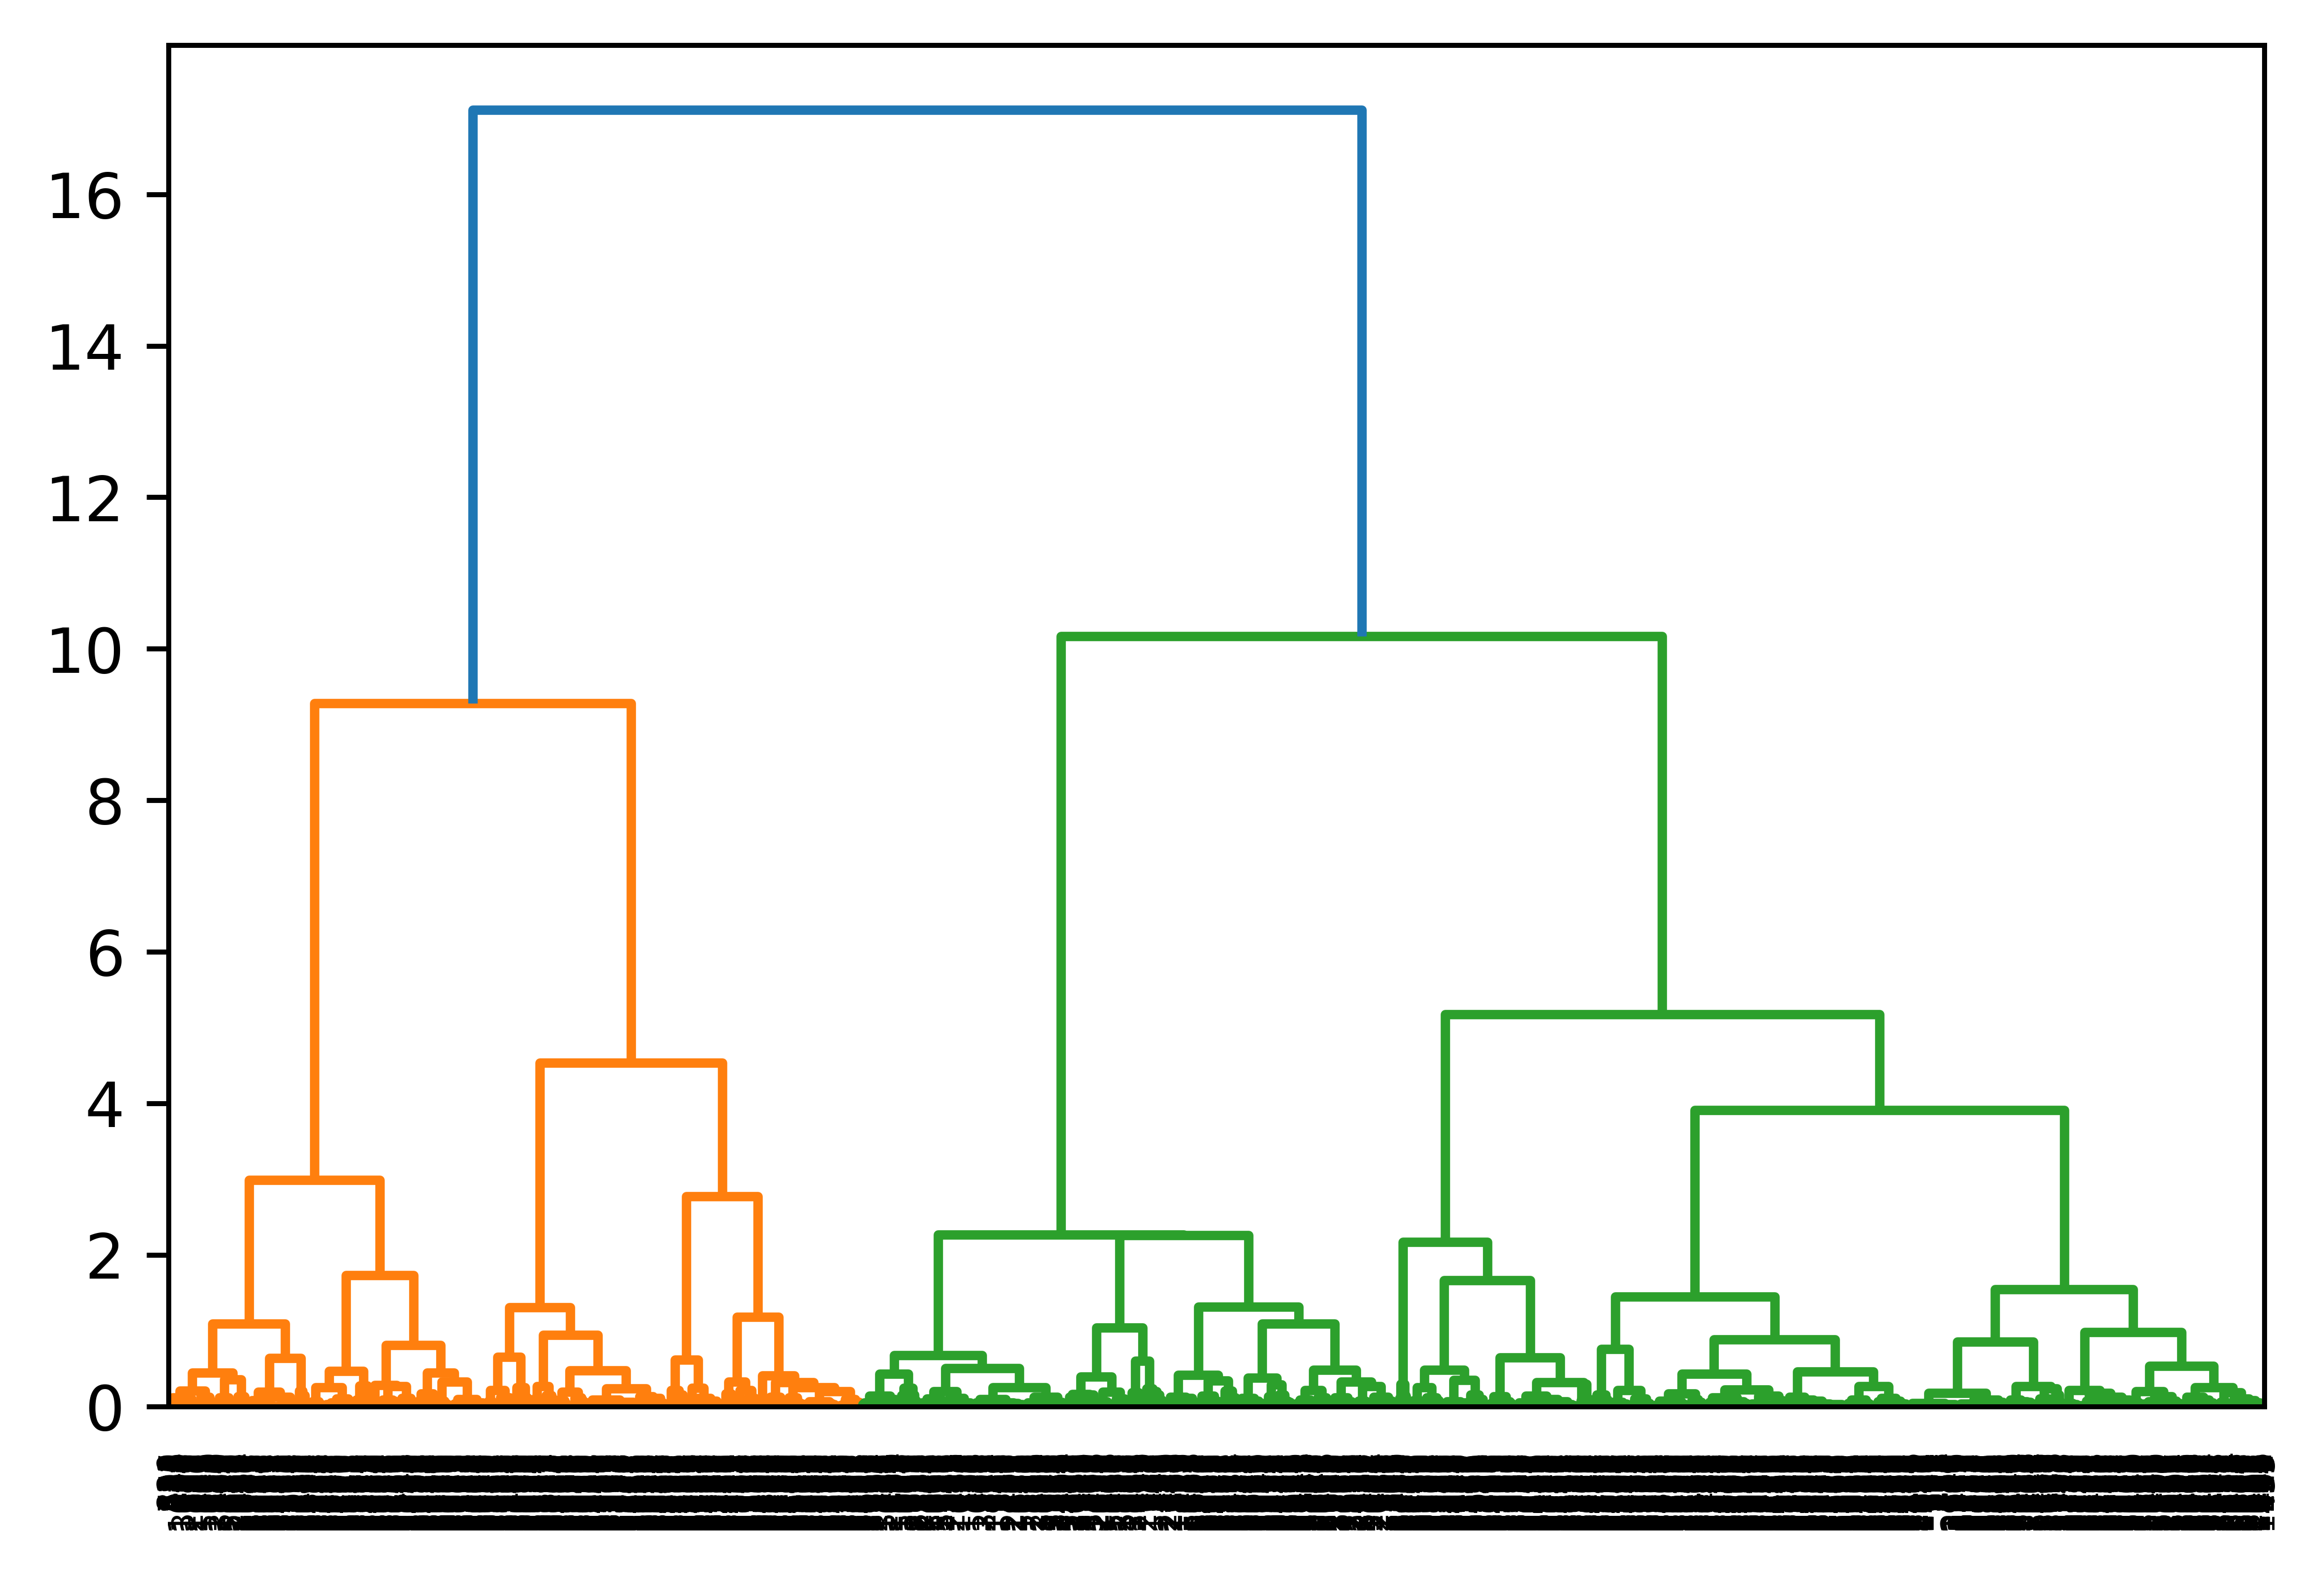

In [ ]:
#开始画层次聚类树状图
Z = hierarchy.linkage(df.drop("City", axis=1), method ='ward',metric='euclidean')
fig, axes = plt.subplots(1, 1, dpi=800)
axes.set_xticks([])
hierarchy.dendrogram(Z,ax = axes, labels = None)
plt.show()

d:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


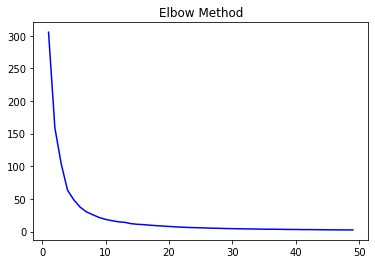

In [ ]:
# 肘部法则的可视化
from sklearn.cluster import KMeans
elbow=[]
for i in range(1,50): # 创建遍历，找到最合适的k值
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=101)
    kmeans.fit(df[['Latitude', 'Longitude']].to_numpy())
    elbow.append(kmeans.inertia_)
# 通过画图找出最合适的K值
import seaborn as sns
sns.lineplot(range(1,50),elbow,color='blue')
plt.rcParams.update({'figure.figsize':(16,10),'figure.dpi':100})
plt.title('Elbow Method')
plt.show()

取类别数为6

In [12]:
label = cluster.hierarchy.cut_tree(Z, n_clusters=6)
label = label.reshape(label.size, )
label

NameError: name 'Z' is not defined

In [ ]:
df['Label'] = label

In [ ]:
x = df['Latitude'].to_numpy()
y = df['Longitude'].to_numpy()
c = df['Label']

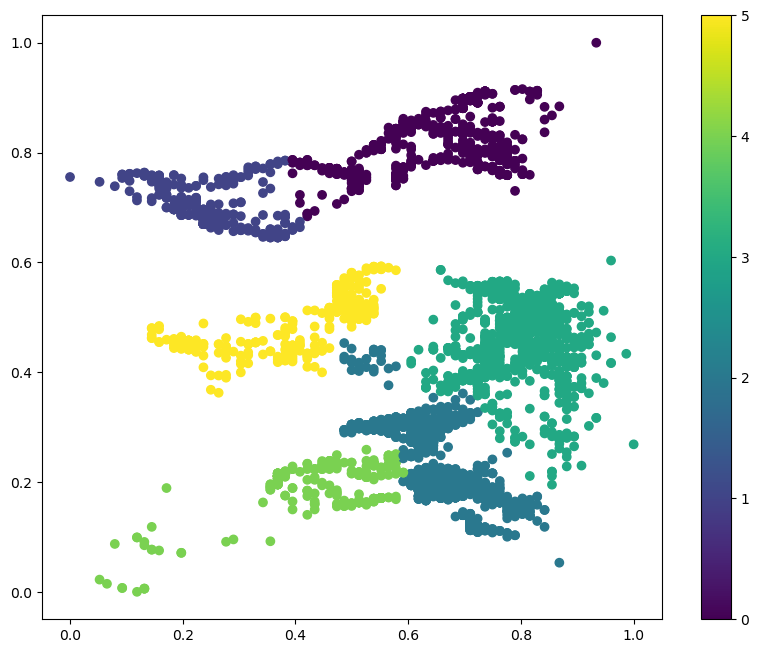

In [ ]:
fig = plt.figure(figsize=(10, 8))
sub = fig.add_subplot(111)

p = sub.scatter(x, y, c=c)
cb = fig.colorbar(p)
plt.show()

In [ ]:
df.to_csv('./data/positoin_label.csv')

In [ ]:
cities = []

In [ ]:
for i in range(6):
    cities.append(df.loc[df['Label'] == i]['City'].to_list())

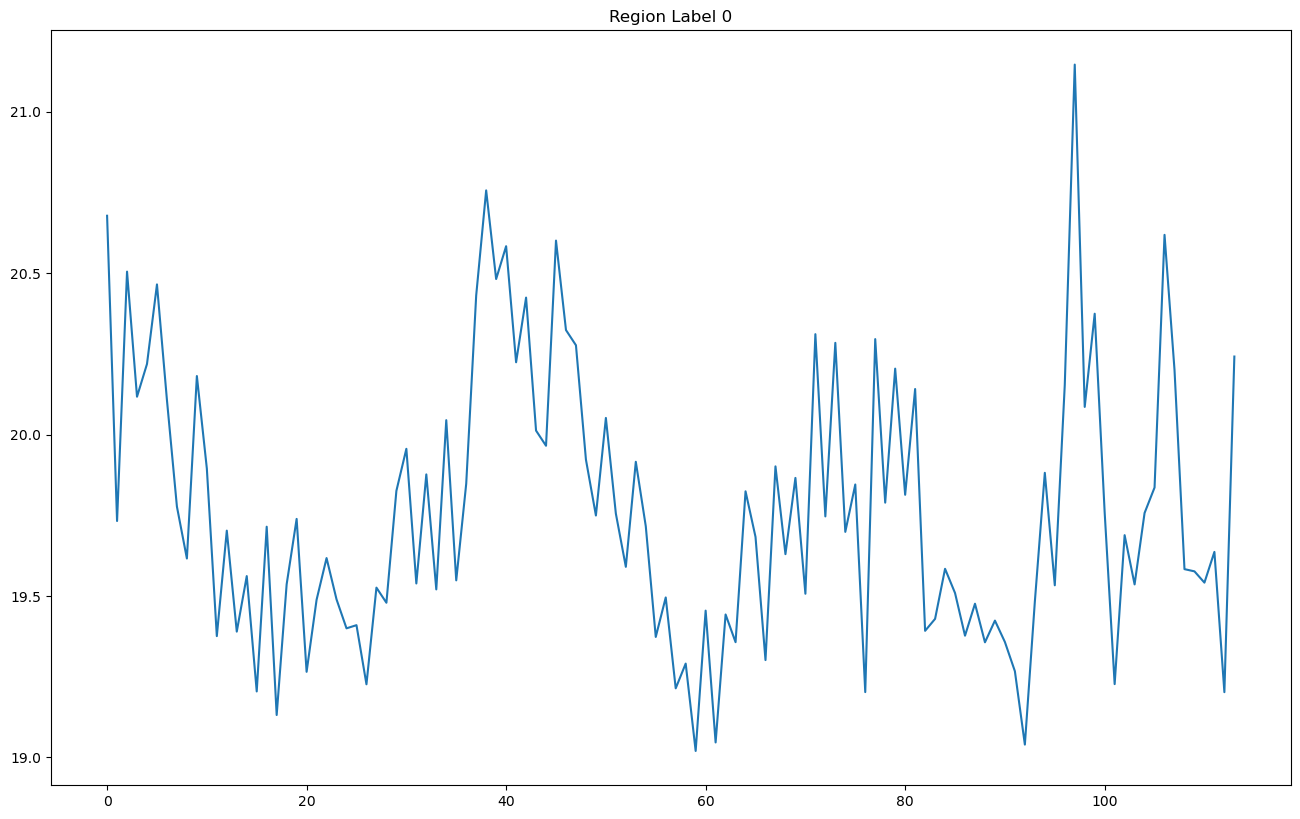

In [ ]:
position = 0
city0_mean = []
city0_df = all_df.loc[all_df['City'].isin(cities[position])]
years = city0_df['dt'].unique()
for i, year in enumerate(years):
    year_mean = city0_df.loc[city0_df['dt']==year]['AverageTemperature'].mean()
    city0_mean.append(year_mean)

city0_time_temp = pd.DataFrame(columns={'dt', 'Mean_temperature'})
city0_time_temp['dt'] = years
city0_time_temp['Mean_temperature'] = city0_mean
x0 = np.arange(len(city0_time_temp))
y0 = city0_time_temp['Mean_temperature'].to_numpy()
plt.plot(x0, y0)
plt.title('Region Label 0')
plt.show()

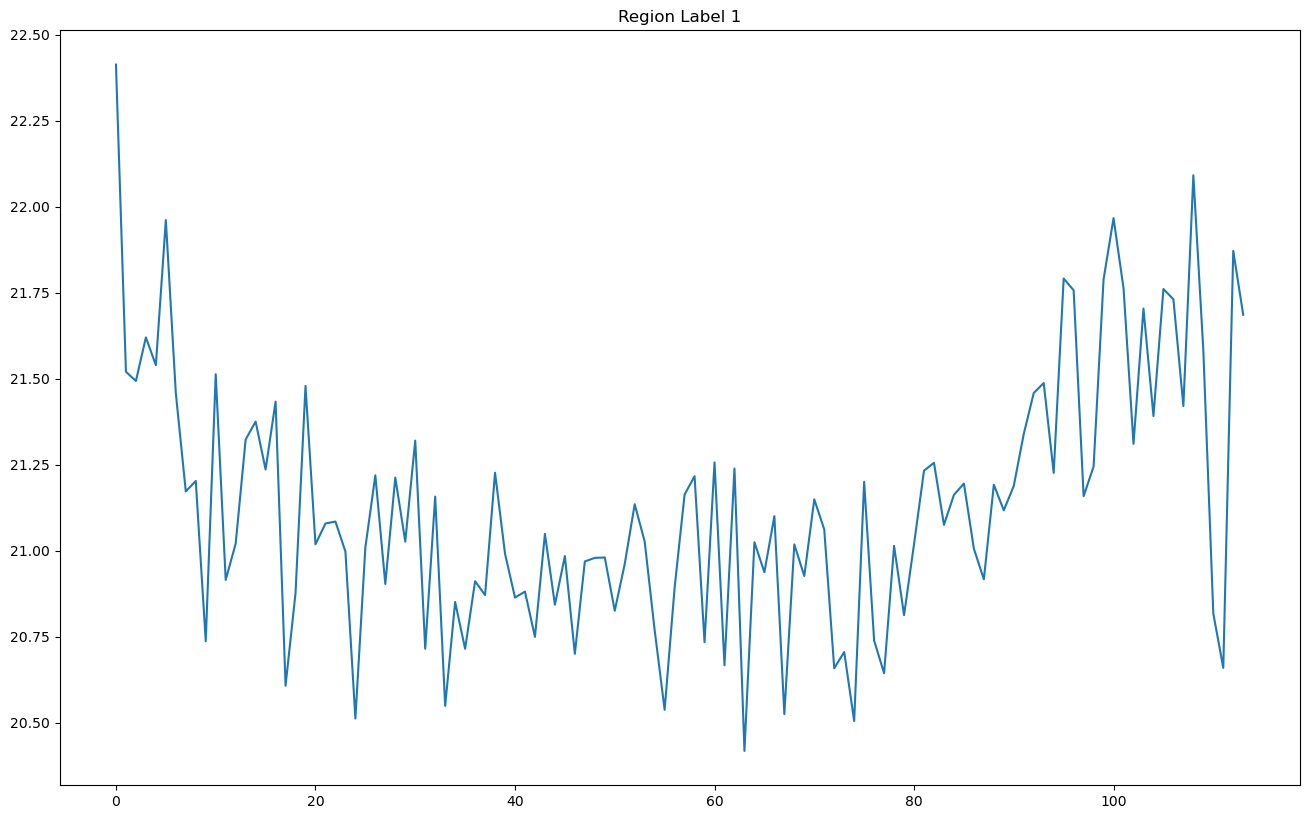

In [ ]:
position = 1
city1_mean = []
city1_df = all_df.loc[all_df['City'].isin(cities[position])]
years = city1_df['dt'].unique()
for i, year in enumerate(years):
    year_mean = city1_df.loc[city1_df['dt']==year]['AverageTemperature'].mean()
    city1_mean.append(year_mean)

city1_time_temp = pd.DataFrame(columns={'dt', 'Mean_temperature'})
city1_time_temp['dt'] = years
city1_time_temp['Mean_temperature'] = city1_mean
x1 = np.arange(len(city0_time_temp))
y1 = city1_time_temp['Mean_temperature'].to_numpy()
plt.plot(x1, y1)
plt.title('Region Label 1')
plt.show()

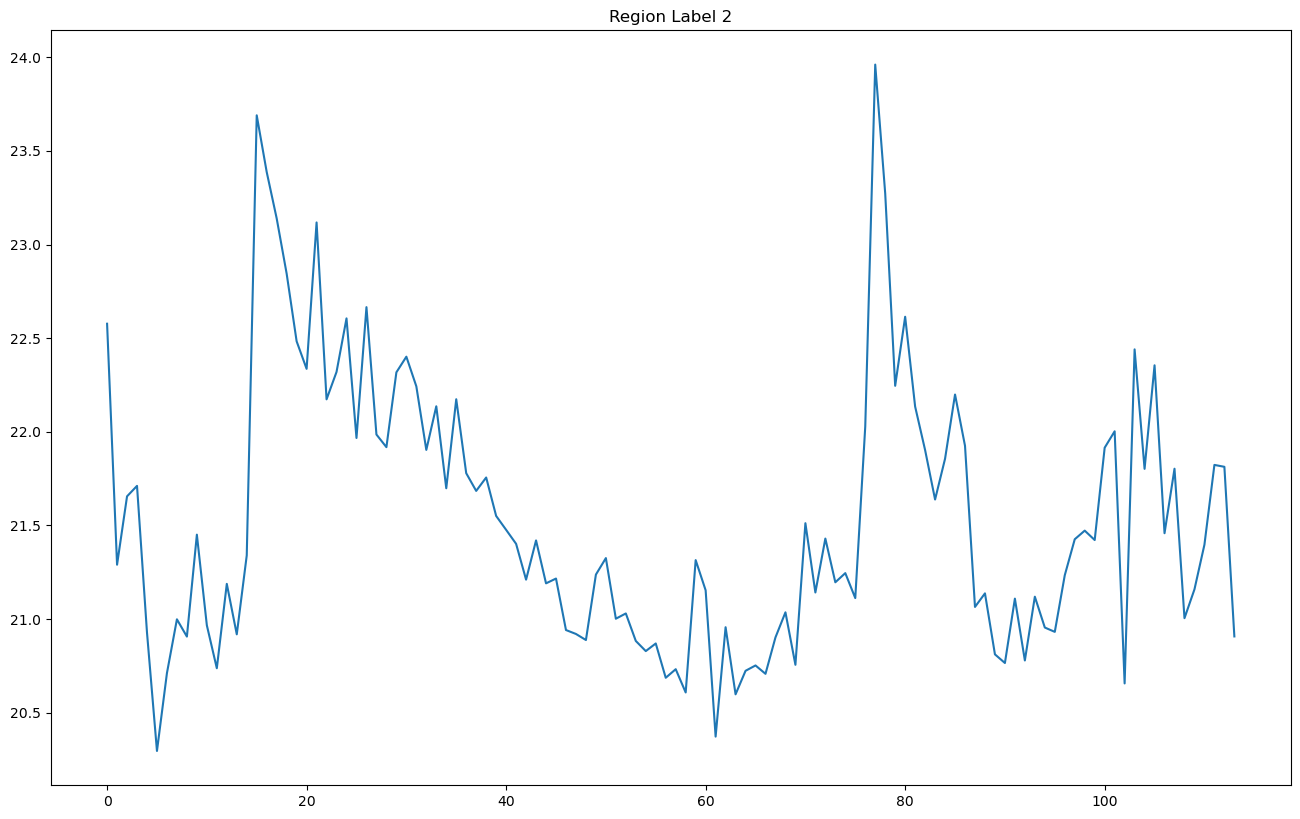

In [ ]:
position = 2
city2_mean = []
city2_df = all_df.loc[all_df['City'].isin(cities[position])]
years = city2_df['dt'].unique()
for i, year in enumerate(years):
    year_mean = city2_df.loc[city2_df['dt']==year]['AverageTemperature'].mean()
    city2_mean.append(year_mean)

city2_time_temp = pd.DataFrame(columns={'dt', 'Mean_temperature'})
city2_time_temp['dt'] = years
city2_time_temp['Mean_temperature'] = city2_mean
x2 = np.arange(len(city2_time_temp))
y2 = city2_time_temp['Mean_temperature'].to_numpy()
plt.plot(x2, y2)
plt.title('Region Label 2')
plt.show()

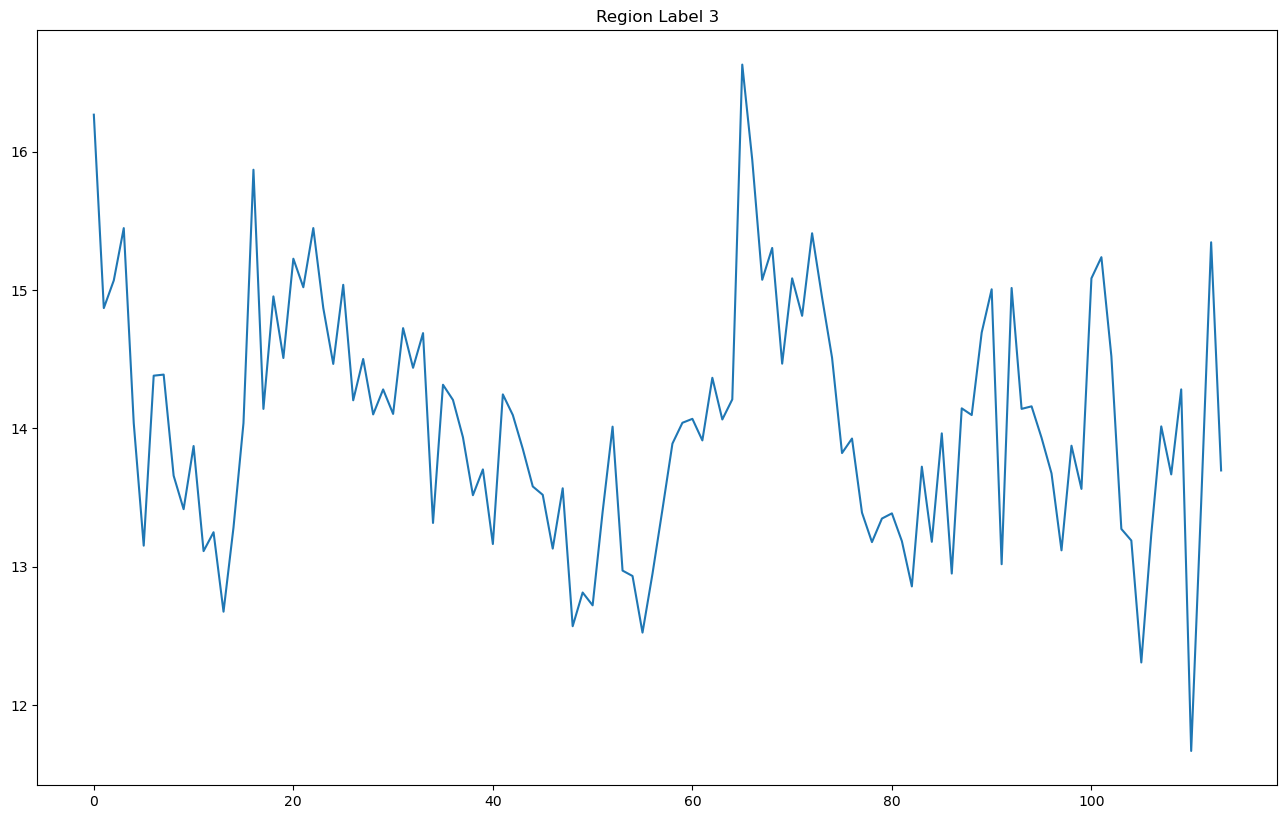

In [ ]:
position = 3
city3_mean = []
city3_df = all_df.loc[all_df['City'].isin(cities[position])]
years = city3_df['dt'].unique()
for i, year in enumerate(years):
    year_mean = city3_df.loc[city3_df['dt']==year]['AverageTemperature'].mean()
    city3_mean.append(year_mean)

city3_time_temp = pd.DataFrame(columns={'dt', 'Mean_temperature'})
city3_time_temp['dt'] = years
city3_time_temp['Mean_temperature'] = city3_mean
x3 = np.arange(len(city3_time_temp))
y3 = city3_time_temp['Mean_temperature'].to_numpy()
plt.plot(x3, y3)
plt.title('Region Label 3')
plt.show()

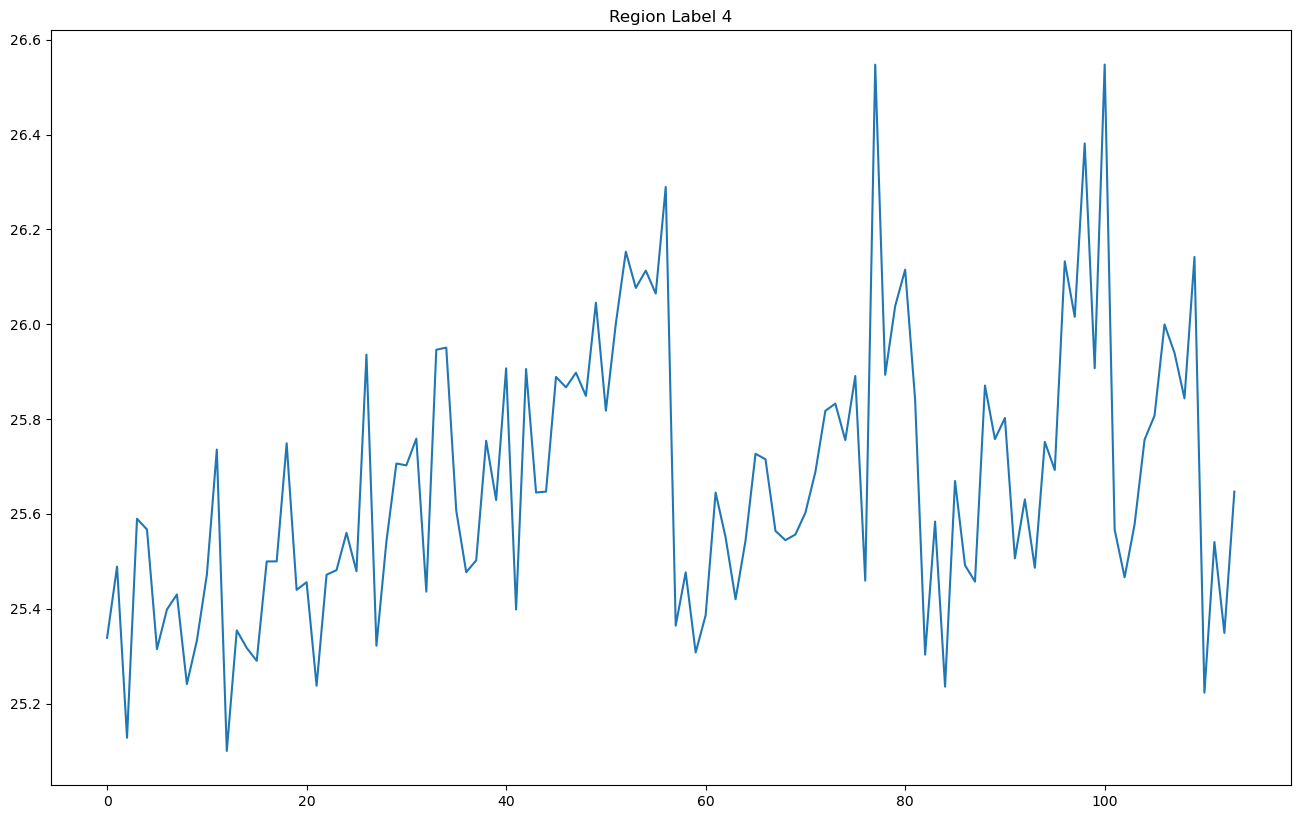

In [ ]:
position = 4
city4_mean = []
city4_df = all_df.loc[all_df['City'].isin(cities[position])]
years = city4_df['dt'].unique()
for i, year in enumerate(years):
    year_mean = city4_df.loc[city4_df['dt']==year]['AverageTemperature'].mean()
    city4_mean.append(year_mean)

city4_time_temp = pd.DataFrame(columns={'dt', 'Mean_temperature'})
city4_time_temp['dt'] = years
city4_time_temp['Mean_temperature'] = city4_mean
x4 = np.arange(len(city4_time_temp))
y4 = city4_time_temp['Mean_temperature'].to_numpy()
plt.plot(x4, y4)
plt.title('Region Label 4')
plt.show()

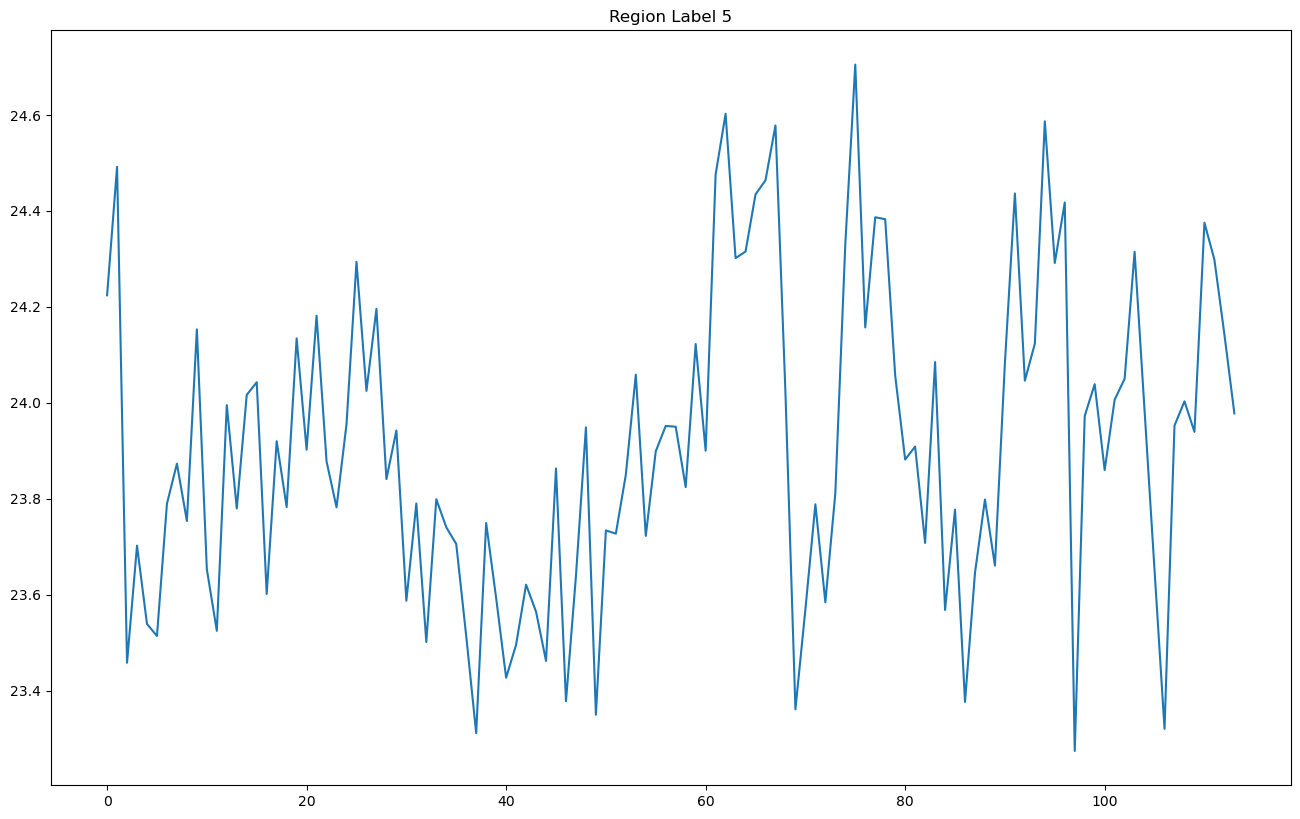

In [ ]:
position = 5
city5_mean = []
city5_df = all_df.loc[all_df['City'].isin(cities[position])]
years = city5_df['dt'].unique()
for i, year in enumerate(years):
    year_mean = city5_df.loc[city5_df['dt']==year]['AverageTemperature'].mean()
    city5_mean.append(year_mean)

city5_time_temp = pd.DataFrame(columns={'dt', 'Mean_temperature'})
city5_time_temp['dt'] = years
city5_time_temp['Mean_temperature'] = city5_mean
x5 = np.arange(len(city5_time_temp))
y5 = city5_time_temp['Mean_temperature'].to_numpy()
plt.plot(x5, y5)
plt.title('Region Label 5')
plt.show()

Text(0.5, 1.0, 'Differen Labels City')

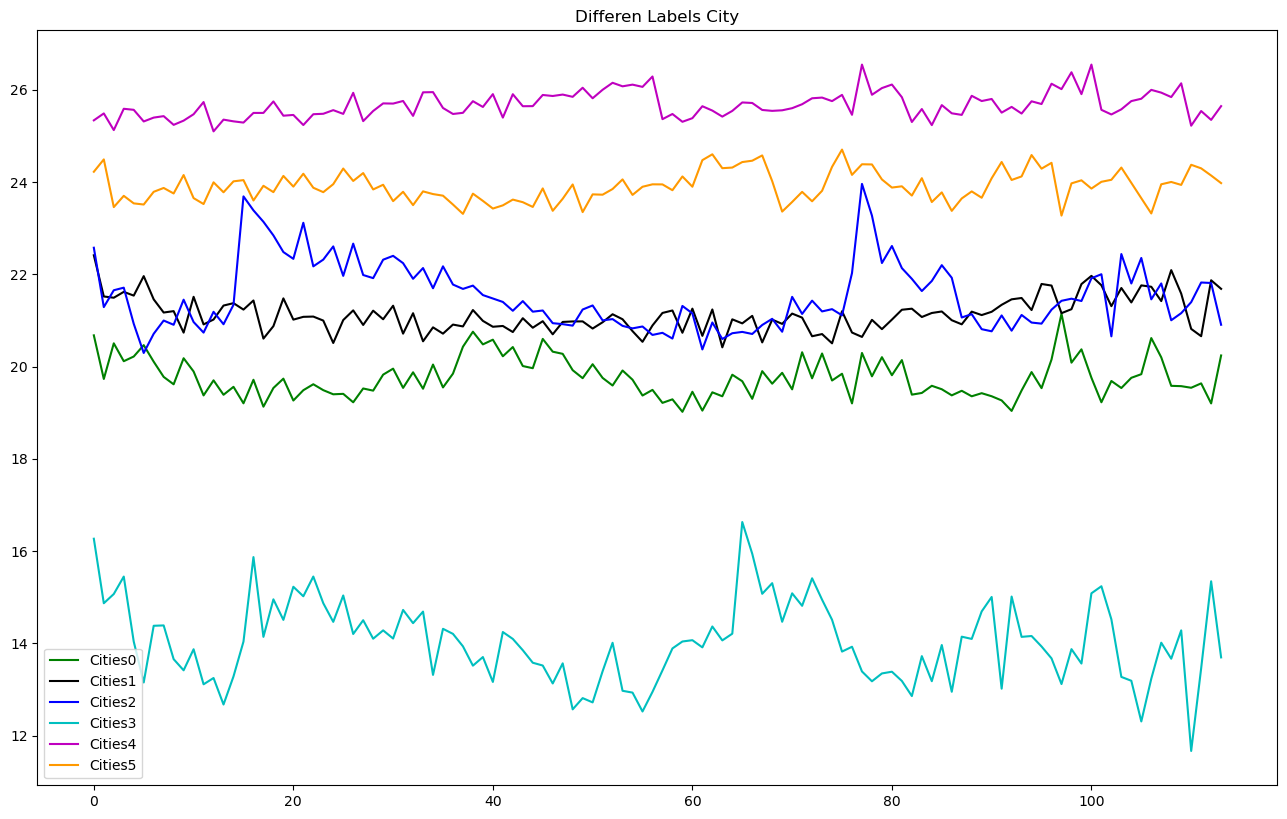

In [ ]:
plt.figure()

plt.plot(x0, y0, color='g', label='Cities0')
plt.plot(x1, y1, color='k', label='Cities1')
plt.plot(x2, y2, color='b', label='Cities2')
plt.plot(x3, y3, color='c', label='Cities3')
plt.plot(x4, y4, color='m', label='Cities4')
plt.plot(x5, y5, color="#FF9900", label='Cities5')
plt.legend()
plt.title("Differen Labels City")